# mpld3 notebook demo
Programmer's club 28th September 2017

In [1]:
import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('Agg')

import matplotlib.pyplot as plt
import mpld3

In [2]:
x1, x2, y1, y2, z = 'teff', 'mass', 'Vmag', 'par', 'logg'

df = pd.read_table('stars.csv')
columns = df.columns.values
df = df.loc[:, list(set(['Star', x1, x2, y1, y2, z]))].dropna(axis=0)


### Standard matplotlib plot

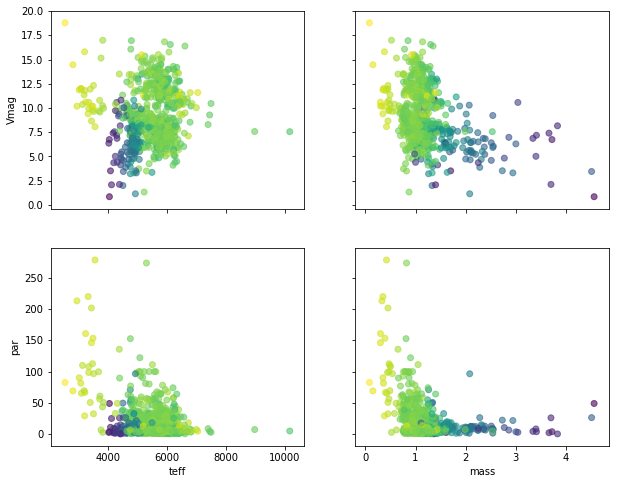

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex='col', sharey='row')
points = ax[0, 0].scatter(df[x1], df[y1], c=df[z], alpha=0.6)
points = ax[1, 0].scatter(df[x1], df[y2], c=df[z], alpha=0.6)
points = ax[0, 1].scatter(df[x2], df[y1], c=df[z], alpha=0.6)
points = ax[1, 1].scatter(df[x2], df[y2], c=df[z], alpha=0.6)
ax[1, 0].set_xlabel(x1)
ax[1, 1].set_xlabel(x2)
ax[0, 0].set_ylabel(y1)
ax[1, 0].set_ylabel(y2)

plt.show()


### Using mpld3 for display

In [4]:

fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex='col', sharey='row')
points = ax[0, 0].scatter(df[x1], df[y1], c=df[z], alpha=0.6)
points = ax[1, 0].scatter(df[x1], df[y2], c=df[z], alpha=0.6)
points = ax[0, 1].scatter(df[x2], df[y1], c=df[z], alpha=0.6)
points = ax[1, 1].scatter(df[x2], df[y2], c=df[z], alpha=0.6)
ax[1, 0].set_xlabel(x1)
ax[1, 1].set_xlabel(x2)
ax[0, 0].set_ylabel(y1)
ax[1, 0].set_ylabel(y2)

mpld3.display()


# Some interactivity

In [5]:
from mpld3 import plugins

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax[::-1]

fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex='col', sharey='row')
points = ax[0, 0].scatter(df[x1], df[y1], c=df[z], alpha=0.6)
points = ax[1, 0].scatter(df[x1], df[y2], c=df[z], alpha=0.6)
points = ax[0, 1].scatter(df[x2], df[y1], c=df[z], alpha=0.6)
points = ax[1, 1].scatter(df[x2], df[y2], c=df[z], alpha=0.6)
        
plugins.connect(fig, plugins.LinkedBrush(points))
mpld3.display()